---
# <font color="SPRINGGREEN"> SUPPORT VECTOR MACHINES (SVM)
---
<font color="LIGHTSLATEGRAY">Prepared by **NICHOLAS DOMINIC**
<br>Guided from *Aurélien Géron*'s **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow** (2nd ed., by O’Reilly Media, Inc.)
<br>Powered by Interactive Python **Jupyter Notebook** (.ipynb), developed with **Python 3.7**

> **TABLE OF CONTENTS**<br>
<br> [SVM Supporting User-defined Functions](#-SVM-Supporting-User-defined-Functions)
<br> [Linear Support Vector Classification / SVC](#-LINEAR-SVM-CLASSIFICATION)
<br> [Non-Linear Support Vector Classification / SVC](#-NON-LINEAR-SVM-CLASSIFICATION)
<br> [Linear Support Vector Regression / SVR](#-LINEAR-SVM-REGRESSION)
<br> [Non-Linear Support Vector Regression / SVR](#-NON-LINEAR-SVM-REGRESSION)

In [1]:
import numpy as np
from pandas import DataFrame as df
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler as sts
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.svm import SVC # Support Vector Classification
from sklearn.svm import SVR # Support Vector Regression
from sklearn.datasets import load_iris # dataset for Linear SVM Classification
from sklearn.datasets import make_moons # dataset for Non-Linear SVM Classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures as pf

> <font color='red'>**TO BE NOTICE ABOUT sklearn.svm LIBRARY**</font>
<br> -- sklearn.svm.SVC/SVR has **more available kernels**, by default **kernel='rbf'**.
<br> -- sklearn.svm.LinearSVC/SVR is the same as SVC/SVR but with **kernel='linear'** only.
<br> **Explore the documentation**: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) / [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) / [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) / [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html)

In [2]:
# Access Dictionary using dot (.)
class dot(dict):
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

## <font color="springgreen"> SVM Supporting User-defined Functions
Useful links:
* [How to Interpret SVM Weights?](https://stats.stackexchange.com/questions/39243/how-does-one-interpret-svm-feature-weights)
* [Why use Vertical Shift == 1/w?](https://stackoverflow.com/questions/51778970/decision-boundary-plot-for-support-vector-classifier-distance-from-separating-h)
* [Remind the General Form of Linear Equation](http://zonalandeducation.com/mmts/functionInstitute/linearFunctions/newLgf/lgf0.php#:~:text=The%20formula%200%20%3D%20Ax%20%2B%20By,which%20form%20a%20certain%20line.)

In [3]:
# Use for plotting classification dataset only
def plot_dataset(x, y, title="1D Hyperplane ($x_1$, $x_2$)", colors=["xkcd:bright violet", "xkcd:aquamarine"], grid=True):
    plt.title(title)
    plt.xlabel("$x_1$", fontsize=15)
    plt.ylabel("$x_2$", fontsize=15)
    plt.scatter(x[:, 0][y==0], x[:, 1][y==0], color=colors[0]) # plot all features with target == 0
    plt.scatter(x[:, 0][y==1], x[:, 1][y==1], color=colors[1]) # plot all features with target == 1
    plt.grid(grid)

In [4]:
# This function uses for LINEAR SVM CLASSIFICATION
def plot_svc(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x = np.linspace(xmin, xmax)
    
    # SVM Equation ==> w^T.x + b = 0, where w^T is transposed weights
    # Generalize this equation ==> w0.x0 + w1.x1 + b = 0
    # Rearrange => x1 = -w0/w1 * x0 - b/w1 (divide by w1 to get x1, which is Y in linear function)
    hyperplane = -w[0]/w[1] * x - b/w[1]
    vertical_shift = 1 / w[1] # use to draw gutter up and gutter down
    upper_supvec_line = hyperplane + vertical_shift # or gutter_up
    lower_supvec_line = hyperplane - vertical_shift # or gutter_down
   
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=300, linewidth=3, edgecolors='red', facecolors='none', label="Support Vectors")
    plt.plot(x, hyperplane, "k-", linewidth=2, label="Hyperplane")
    plt.plot(x, upper_supvec_line, "k--", linewidth=2, label='Support Vector Lines')
    plt.plot(x, lower_supvec_line, "k--", linewidth=2)
    plt.grid(True)
    plt.legend(loc='best')

In [5]:
def svm_info(svm, full=False):
    try:
        # Slope / Coefficient / w in SVM
        print("Slope/Weights: {}".format(list(map(lambda x: round(x, 3), svm.coef_[0]))))
        
        # Intercept / Constant / b in SVM
        print("Intercept: [{}]".format(round(svm.intercept_[0], 3)))
        
        # SVM Hyperplane Equation
        print("SVM Hyperplane Equation: [{} {}]x + ({}) = 0".format(
            round(svm.coef_[0][0], 3), 
            round(svm.coef_[0][1], 3), 
            round(svm.intercept_[0], 3))
        )
        
        # SVM Margin
        print("SVM Margin: {}".format(round(2/np.sqrt(svm.coef_[0][0]**2 + svm.coef_[0][1]**2), 3)))
        
        # Support Vectors (in coordinate)
        print("Support Vectors: ")
        for a in range(len(svm.support_vectors_.tolist())):
            print("\t", list(map(lambda x: round(x, 3), svm.support_vectors_.tolist()[a])))
            
        # Total of Support Vector(s) in each class
        for i in range(len(svm.n_support_.tolist())):
            print("Total of Support Vector(s) in Class_{}: [{}]".format(i+1, svm.n_support_.tolist()[i]))
        
        if full:
            # Maximum Iteration on SVM Model
            if svm.max_iter == -1:
                print("Maximum Iteration: NO LIMIT")
            else:
                print("Maximum Iteration: {}".format(svm.max_iter))
            
            # Regularization Parameter (C)
            print("Regularization parameter (C): {}".format(svm.C))
            
            # Kernel used in current SVM Model
            print("Kernel: {}".format(svm.kernel.upper()))
    except:
        raise ValueError("Make sure your object is sklearn.svm.SVC.fit()")

In [6]:
# This function uses for NON-LINEAR SVM CLASSIFICATION
def plot_predictions(clf, axes, colormap='spring'):
    x0s = np.linspace(axes[0], axes[1], 100) # np.linspace(starting_value_of_seq, stoping_value_of_seq, number_of_samples_to_generate)
    x1s = np.linspace(axes[2], axes[3], 100) # np.linspace(starting_value_of_seq, stoping_value_of_seq, number_of_samples_to_generate)
    x0, x1 = np.meshgrid(x0s, x1s) # np.meshgrid will return coordinate matrices from coordinate vectors
    X = np.c_[x0.ravel(), x1.ravel()] # np.c_ to concatenate and np.ravel() for flatten an array
    
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    # colormap documentation here: matplotlib.org/3.2.1/tutorials/colors/colormaps.html
    plt.contourf(x0, x1, y_pred, cmap=colormap, alpha=.2) # plot contour
    plt.contourf(x0, x1, y_decision, cmap=colormap, alpha=.1) # plot contour

In [7]:
# This function uses for SVM Regression
def plot_svm_regression(svm_reg, X, Y, axes):
    x_axis = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    hyperplane = svm_reg.predict(x_axis) # it's y-predict
    upper_supvec_line = hyperplane + svm_reg.epsilon
    lower_supvec_line = hyperplane - svm_reg.epsilon

    plt.scatter(X[svm_reg.support_], Y[svm_reg.support_], s=300, linewidth=3, edgecolors='xkcd:neon blue', facecolors='none', label="Support Vectors")    
    plt.plot(x_axis, hyperplane, "k-", linewidth=3, label=r"$\hat{y}$ (hyperplane)")
    plt.plot(x_axis, upper_supvec_line, "k--", linewidth=2, label='Support Vector Lines')
    plt.plot(x_axis, lower_supvec_line, "k--", linewidth=2)
    
    if svm_reg.kernel == 'poly':
        plt.title("SVRegression, with C = {}, degree = {}, and $\epsilon$ = {}".format(svm_reg.C, svm_reg.degree, svm_reg.epsilon))
    else:
        plt.title("SVRegression, with C = {} and $\epsilon$ = {}".format(svm_reg.C, svm_reg.epsilon))
    plt.xlabel("x", fontsize=15)
    plt.ylabel("y", fontsize=15)
    plt.grid(True)
    plt.legend(loc='best')

## <font color="springgreen"> LINEAR SVM CLASSIFICATION</font>

### IRIS Dataset Loading

In [8]:
iris = load_iris()
x = iris.data[:, (2, 3)]  # only use iris features of petal length and petal width
y = iris.target

In [9]:
setosa_or_versicolor = (y == 0) | (y == 1) # only use iris targets of setosa (0) or versicolor (1)
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [10]:
df(data=np.c_[x, y], columns=iris.feature_names[2:]+['TARGET'])

,petal length (cm),petal width (cm),TARGET
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
95,4.2,1.2,1.0
96,4.2,1.3,1.0
97,4.3,1.3,1.0
98,3.0,1.1,1.0


In [11]:
iris.target_names # Iris dataset labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

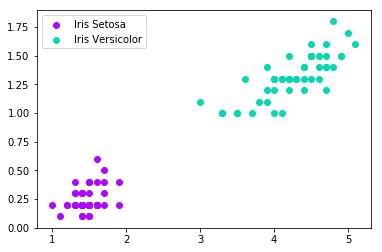

In [12]:
plt.scatter(x[:, 0][y==0], x[:, 1][y==0], color="xkcd:bright violet", label="Iris Setosa") # plot all features with target == 0 (setosa)
plt.scatter(x[:, 0][y==1], x[:, 1][y==1], color="xkcd:aquamarine", label="Iris Versicolor") # plot all features with target == 1 (versicolor)
plt.legend(loc='best')

* <font color="green">**Hard/Large Margin SVM Classification**</font>
<br> - Sensitive to *features scaling*
<br> - Sensitive to *outliers*

Slope/Weights: [1.294, 0.824]
Intercept: [-3.788]
SVM Hyperplane Equation: [1.294 0.824]x + (-3.788) = 0
SVM Margin: 1.304
Support Vectors: 
	 [1.9, 0.4]
	 [3.0, 1.1]
Total of Support Vector(s) in Class_1: [1]
Total of Support Vector(s) in Class_2: [1]
Maximum Iteration: NO LIMIT
Regularization parameter (C): 100
Kernel: LINEAR


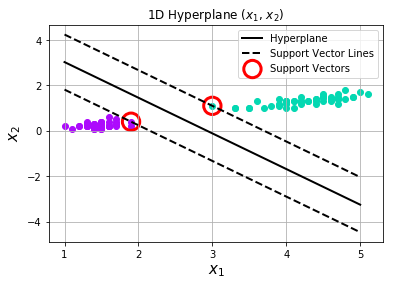

In [13]:
svm_classif = SVC(kernel='linear', C=100).fit(x, y)

plot_dataset(x, y)
plot_svc(svm_classif, 1, 5)
svm_info(svm_classif, full=True)

<font color="red">**BE CAREFUL**</font> since Hard Margin SVM is very sensitive to *feature scaling*. Thus, more than one support vector might be detected as features rescaled.

Slope/Weights: [10.365, 8.915]
Intercept: [-2.16]
SVM Hyperplane Equation: [10.365 8.915]x + (-2.16) = 0
SVM Margin: 0.146
Support Vectors: 
	 [0.051, 0.071]
	 [0.044, 0.088]
	 [0.168, 0.159]
	 [0.146, 0.176]
Total of Support Vector(s) in Class_1: [2]
Total of Support Vector(s) in Class_2: [2]
Maximum Iteration: NO LIMIT
Regularization parameter (C): 100
Kernel: LINEAR


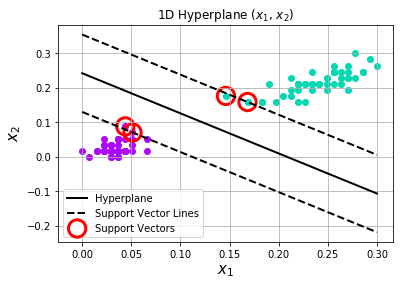

In [14]:
x_scaled = mms((0, .3)).fit_transform(x) # scaling x

svm_classif_scaled = SVC(kernel='linear', C=100).fit(x_scaled, y)
plot_dataset(x_scaled, y)
plot_svc(svm_classif_scaled, 0, .3)
svm_info(svm_classif_scaled, full=True)

Let see a little bit closer with sample data.
<br> Even the SVM Margin itself will repositioned if the feature is scaled.

First Attempt
Slope/Weights: [0.033, 0.124]
Intercept: [-7.257]
SVM Hyperplane Equation: [0.033 0.124]x + (-7.257) = 0
SVM Margin: 15.524
Support Vectors: 
	 [1.0, 50.0]
	 [5.0, 65.0]
Total of Support Vector(s) in Class_1: [1]
Total of Support Vector(s) in Class_2: [1]

Second Attempt
Slope/Weights: [0.283, 0.825]
Intercept: [-0.0]
SVM Hyperplane Equation: [0.283 0.825]x + (-0.0) = 0
SVM Margin: 2.294
Support Vectors: 
	 [-1.414, -0.728]
	 [0.0, -1.213]
	 [0.0, 1.213]
	 [1.414, 0.728]
Total of Support Vector(s) in Class_1: [2]
Total of Support Vector(s) in Class_2: [2]


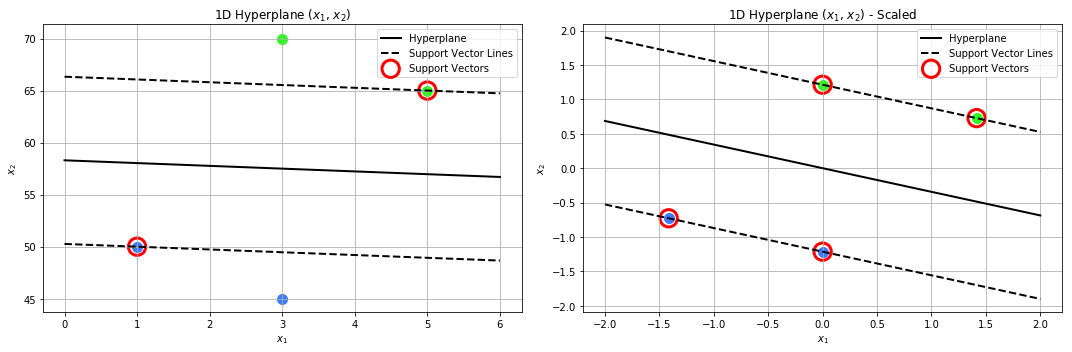

In [15]:
# Generate SAMPLE dataset
xs = np.array([[1, 50], [3, 45], [3, 70], [5, 65]]).astype(np.float64)
ys = np.array([0, 0, 1, 1]) # target

# Set a big figure (to be assigned by each subplot later)
fig = plt.figure(figsize=(15, 5))

# FIRST Attempt
svm_classif1 = SVC(kernel='linear', C=100).fit(xs, ys)

a = fig.add_subplot(1, 2, 1); # .add_subplot(row, column, position) where position must starts from 1
plt.title("1D Hyperplane ($x_1$, $x_2$)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
a.scatter(xs[:, 0][ys==0], xs[:, 1][ys==0], s=100, color="xkcd:lightish blue") # plot all features with target == 0
a.scatter(xs[:, 0][ys==1], xs[:, 1][ys==1], s=100, color="xkcd:radioactive green") # plot all features with target == 1

plot_svc(svm_classif1, 0, 6)
print("First Attempt")
svm_info(svm_classif1)

# SECOND Attempt (standarize the data)
xs_scaled = sts().fit_transform(xs)
svm_classif2 = SVC(kernel='linear', C=100).fit(xs_scaled, ys)

b = fig.add_subplot(1, 2, 2)
plt.title("1D Hyperplane ($x_1$, $x_2$) - Scaled")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
b.scatter(xs_scaled[:, 0][ys==0], xs_scaled[:, 1][ys==0], s=100, color="xkcd:lightish blue") # plot all features with target == 0
b.scatter(xs_scaled[:, 0][ys==1], xs_scaled[:, 1][ys==1], s=100, color="xkcd:radioactive green") # plot all features with target == 1

plot_svc(svm_classif2, -2, 2)
print("\nSecond Attempt")
svm_info(svm_classif2)

# Adjusting subplot margins
fig.tight_layout()

<font color="red">**ALSO**</font>, Hard Margin SVM is very sensitive to outlier. See this example below, when SVM doesn't work (incorrect detection of support vectors).

Slope/Weights: [0.2, 0.08]
Intercept: [-5.201]
SVM Hyperplane Equation: [0.2 0.08]x + (-5.201) = 0
SVM Margin: 9.297
Support Vectors: 
	 [1.0, 50.0]
	 [3.0, 45.0]
	 [5.0, 70.0]
	 [3.0, 70.0]
	 [5.0, 65.0]
Total of Support Vector(s) in Class_1: [3]
Total of Support Vector(s) in Class_2: [2]


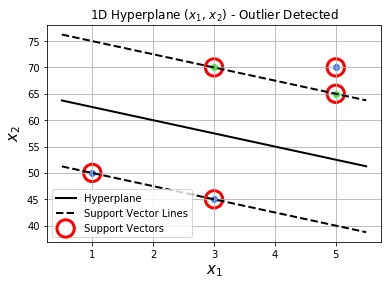

In [16]:
# Generate SAMPLE dataset
xo = np.array([[1, 50], [3, 45], [3, 70], [5, 65], [5, 70]]).astype(np.float64)
yo = np.array([0, 0, 1, 1, 0]) # target

# FIRST Attempt
svm_classif3 = SVC(kernel='linear', C=100).fit(xo, yo)
plot_dataset(xo, yo, title="1D Hyperplane ($x_1$, $x_2$) - Outlier Detected", colors=["xkcd:lightish blue", "xkcd:radioactive green"])
plot_svc(svm_classif3, .5, 5.5)
svm_info(svm_classif3)

* <font color="green">**Soft Margin SVM Classification**</font>
<br> More flexible approach (has *tolerance*): Keep margin *as large as possible*, while also *limit the margin violation* (limit the data which lies between hyperplane and other gutter lines, or even on the wrong side class).

In [17]:
# Renewed Dataset (now to compare class1 = versicolor and class2 = virginica)
versicolor_or_virginica = (iris.target == 1) | (iris.target == 2) # only use versicolor (1) or virginica (2)
xx = iris.data[:, (2, 3)]
xx = xx[versicolor_or_virginica]
yy = iris.target[versicolor_or_virginica]
df(data=np.c_[xx, yy], columns=iris.feature_names[2:]+['TARGET'])

,petal length (cm),petal width (cm),TARGET
0,4.7,1.4,1.0
1,4.5,1.5,1.0
2,4.9,1.5,1.0
3,4.0,1.3,1.0
4,4.6,1.5,1.0
...,...,...,...
95,5.2,2.3,2.0
96,5.0,1.9,2.0
97,5.2,2.0,2.0
98,5.4,2.3,2.0


### – SVM Hyperparameter (1)
To generate a soft margin SVM, tune in <font color="red">**C**</font> as *SVM hyperparameter*. For instance, to handle overfitting in SVM model, try to *reduce* the value of C.

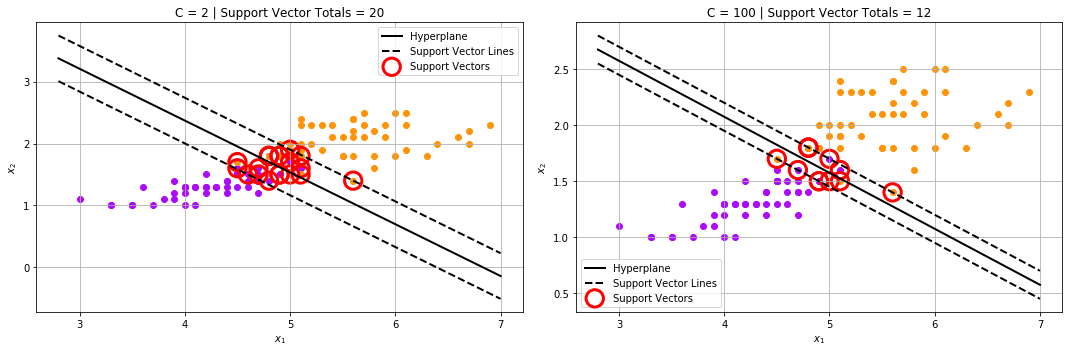

In [18]:
# Resize whole figure size
soft_fig = plt.figure(figsize=(15, 5))

# FIRST ATTEMPT
svm_soft_classif1 = SVC(kernel='linear', C=2).fit(xx, yy) # first SVM model with regularization parameter C = 2

c = soft_fig.add_subplot(1, 2, 1)
plt.title("C = {} | Support Vector Totals = {}".format(svm_soft_classif1.C, svm_soft_classif1.n_support_[0]+svm_soft_classif1.n_support_[1]))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
c.scatter(xx[:, 0][yy==1], xx[:, 1][yy==1], color="xkcd:bright violet") # plot all features with target == 1 (versicolor)
c.scatter(xx[:, 0][yy==2], xx[:, 1][yy==2], color="xkcd:tangerine") # plot all features with target == 2 (virginica)

plot_svc(svm_soft_classif1, 2.8, 7)

# SECOND ATTEMPT
svm_soft_classif2 = SVC(kernel='linear', C=100).fit(xx, yy) # second SVM model with regularization parameter C = 100

d = soft_fig.add_subplot(1, 2, 2)
plt.title("C = {} | Support Vector Totals = {}".format(svm_soft_classif2.C, svm_soft_classif2.n_support_[0]+svm_soft_classif2.n_support_[1]))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
d.scatter(xx[:, 0][yy==1], xx[:, 1][yy==1], color="xkcd:bright violet") # plot all features with target == 1 (versicolor)
d.scatter(xx[:, 0][yy==2], xx[:, 1][yy==2], color="xkcd:tangerine") # plot all features with target == 2 (virginica)

plot_svc(svm_soft_classif2, 2.8, 7)
plt.tight_layout()

## <font color="springgreen"> NON-LINEAR SVM CLASSIFICATION

### MAKE_MOONS Dataset

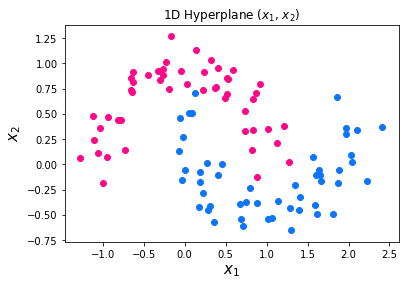

In [19]:
input_, target_ = make_moons(noise=.15, random_state=42) # add noise as standard deviation of Gaussian
plot_dataset(input_, target_, colors=["xkcd:strong pink", "xkcd:deep sky blue"], grid=False)

* <font color="green">**Polynomial Kernel**</font>

### – SVM Hyperparameter (2)
SVM hyperparameters are found here, <font color="red">**degree**</font> and <font color="red">**coef**</font> (in **Polynomial Kernel** only), works as C to handle overfitting in SVM model (by reduce its value).
* The hyperparameter **degree** shows the degree of polynomial function built.
* The hyperparameter **coef** controls how much the model is influenced by highdegree polynomials versus low-degree polynomials.

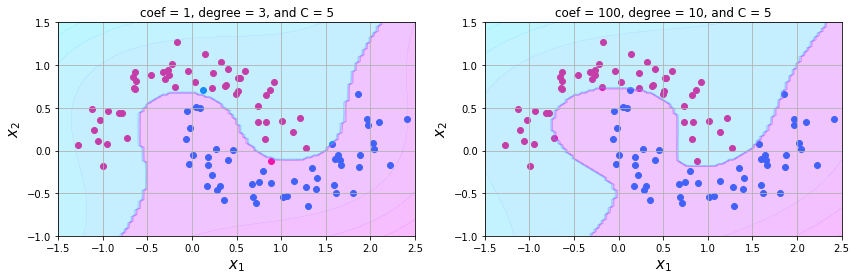

In [20]:
coef1, coef2 = 1, 100
degree1, degree2 = 3, 10
hyperparams = (coef1, degree1), (coef2, degree2)

svm_classif_poly = []
for coef, degree in hyperparams:
    poly_kernel_svm_clf = Pipeline([ # Pipeline format ('name', Class)
        ("scaler", sts()), # sts() for StandardScaler()
        ("svm_clf", SVC(kernel='poly', degree=degree, coef0=coef, C=5))
    ])
    poly_kernel_svm_clf.fit(input_, target_)
    svm_classif_poly.append(poly_kernel_svm_clf)

fig = plt.figure(figsize=(12, 4))
for i, svm in enumerate(svm_classif_poly):
    a = fig.add_subplot(1, 2, i+1)
    
    plot_dataset(input_, target_, colors=["xkcd:strong pink", "xkcd:deep sky blue"]) # plot the make_moons dataset
    plot_predictions(svm, [-1.5, 2.5, -1, 1.5], colormap='cool') # x-axis(-1.5 to 2.5) and y-axis(-1 to 1.5)
    
    coef, degree = hyperparams[i] # retrieved SVM hyperparameters
    plt.title("coef = {}, degree = {}, and C = {}".format(coef, degree, svm_classif_poly[i].steps[1][1].C)) # set title for each plot
fig.tight_layout() # margin adjusted

* <font color="green">**Gaussian RBF (Radial Basis Function) Kernel**</font>

### – SVM Hyperparameter (3)
Another SVM hyperparameter is <font color="red">**$\gamma$ (gamma)**</font> (in **Gaussian RBF Kernel** only), works as C to handle overfitting in SVM model (by reduce its value).
* Increasing **$\gamma$ (gamma)** makes the bell-shaped curve (on Gaussian RBF - Similarity graph) narrower; and as a result, each data point’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual data point.

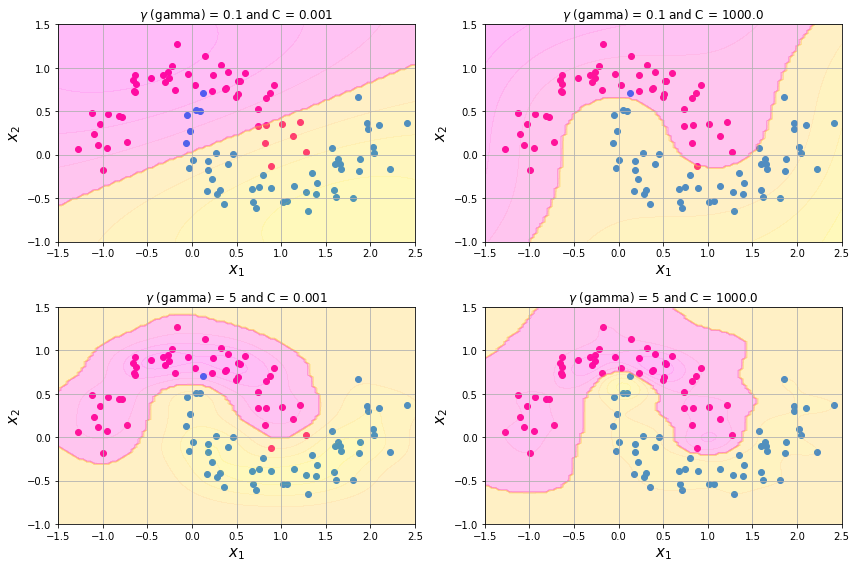

In [21]:
gamma1, gamma2 = .1, 5
C1, C2 = 1e-3, 1e3
hyperparameters = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_classif_nonlinear = []
for gamma, C in hyperparameters:
    rbf_kernel_svm_clf = Pipeline([ # Pipeline format ('name', Class)
        ("scaler", sts()), # sts() for StandardScaler()
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(input_, target_)
    svm_classif_nonlinear.append(rbf_kernel_svm_clf)

fig = plt.figure(figsize=(12, 8)) # resized the whole figure
for i, svm in enumerate(svm_classif_nonlinear):
    a = fig.add_subplot(2, 2, i+1) # .add_subplot(row, column, position) where position must starts from 1
    
    plot_dataset(input_, target_, colors=["xkcd:strong pink", "xkcd:deep sky blue"]) # plot the make_moons dataset
    plot_predictions(svm, [-1.5, 2.5, -1, 1.5]) # x-axis(-1.5 to 2.5) and y-axis(-1 to 1.5)
    
    gamma, C = hyperparameters[i] # retrieved SVM hyperparameters
    plt.title("$\gamma$ (gamma) = {} and C = {}".format(gamma, C)) # set title for each plot
fig.tight_layout() # margin adjusted

## <font color="springgreen"> LINEAR SVM REGRESSION
Unlike SVM Classification, SVM Regression tries to <font color="blue">**fit as many data as possible within**</font> the hyperplane area.
<br> Its <font color="blue">**support vectors**</font>, however, placed on the gutter lines or beyond (as opposite of SVM Classification).

In [22]:
X = 2 * np.random.rand(50, 1)
Y = (4 + 3 * X + np.random.randn(50, 1)).ravel() # regression equation = 4 + 3x + err
df({'x_axis': np.reshape(X, len(X)).tolist(), 'y_axis': np.reshape(Y, len(Y)).tolist()})

,x_axis,y_axis
0,0.615944,6.143164
1,1.436170,8.224640
2,1.431397,10.497765
3,0.851980,4.673319
4,1.270521,8.070832
5,1.679831,10.509730
6,0.800965,6.479467
7,0.648939,5.553303
8,1.599960,9.539381
9,0.499500,5.410610


### – SVM Hyperparameter (4)
In SVM Regression, <font color="red">**$\epsilon$ (epsilon)**</font> works as hyperparameter which controls the margin.

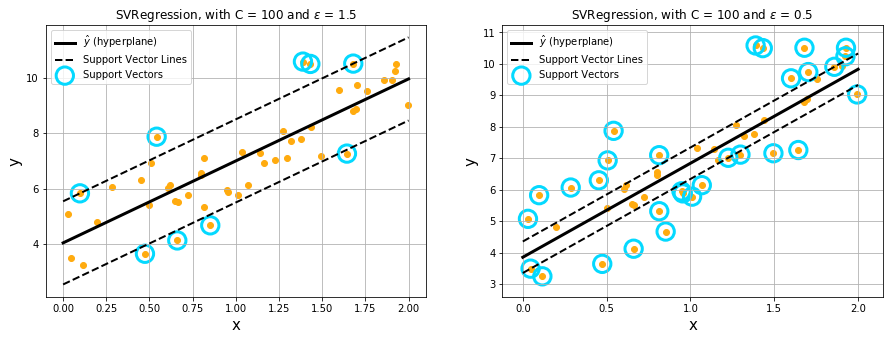

In [23]:
reg_fig = plt.figure(figsize=(15, 5)) # resized the whole figure

a = reg_fig.add_subplot(1, 2, 1)
a.scatter(X, Y, color="xkcd:yellowish orange") # dataset in first subplot
svm_reg1 = SVR(kernel='linear', C=100, epsilon=1.5).fit(X, Y) # first SVR model
plot_svm_regression(svm_reg1, X, Y, [0, 2, 3, 11]) # draw SVR decision boundary

b = reg_fig.add_subplot(1, 2, 2)
b.scatter(X, Y, color="xkcd:yellowish orange") # dataset in second subplot
svm_reg2 = SVR(kernel='linear', C=100, epsilon=.5).fit(X, Y) # second SVR model
plot_svm_regression(svm_reg2, X, Y, [0, 2, 3, 11]) # draw SVR decision boundary### – SVM Hyperparameter (3)

## <font color="springgreen"> NON-LINEAR SVM REGRESSION

In [24]:
XX = 2 * np.random.rand(100, 1) - 1
YY = (.2 + .1 * XX + .5 * XX**2 + np.random.randn(100, 1)/10).ravel() # polynomial regression equation y = 0.2 + 0.1x + 0.5^2 + err
df({'x_axis': np.reshape(XX, len(XX)).tolist(), 'y_axis': np.reshape(YY, len(YY)).tolist()})

,x_axis,y_axis
0,-0.716150,0.510124
1,0.830140,0.654259
2,-0.217206,0.180057
3,0.116039,0.002031
4,0.049661,0.290970
...,...,...
95,0.462910,0.327380
96,-0.074477,-0.009897
97,0.707297,0.605166
98,0.713337,0.439342


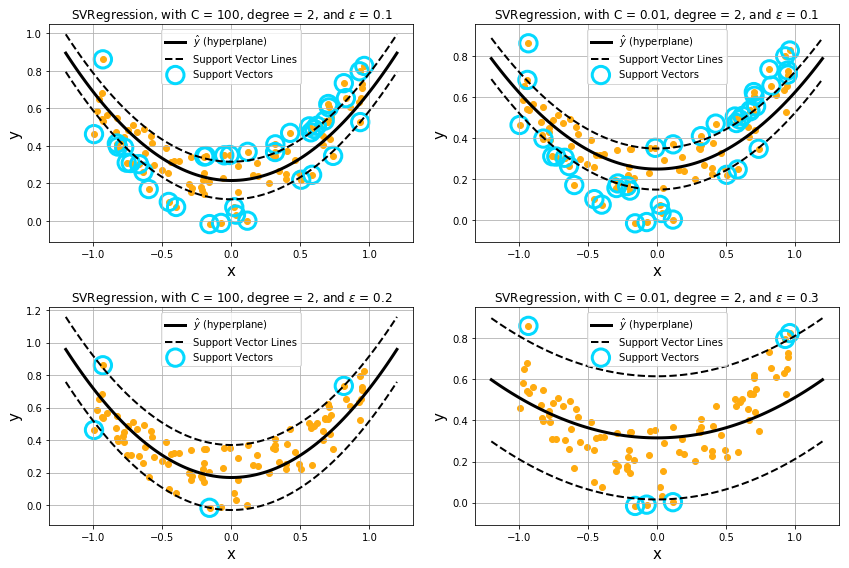

In [25]:
degree = 2 # since we use quadratic function
epsilon1, epsilon2, epsilon3, epsilon4 = .1, .01, .2, .3
C1, C2 = 100, .01
svc_hyperparameters = (degree, epsilon1, C1), (degree, epsilon1, C2), (degree, epsilon3, C1), (degree, epsilon4, C2)

svc_nonlinear = []
for d, e, c in svc_hyperparameters:
    svc_polyreg = SVR(kernel='poly', degree=d, epsilon=e, C=c).fit(XX, YY)
    svc_nonlinear.append(svc_polyreg) 

regpoly_fig = plt.figure(figsize=(12, 8)) # resized the whole figure
for i, svc in enumerate(svc_nonlinear):
    a = regpoly_fig.add_subplot(2, 2, i+1)  # .add_subplot(row, column, position) where position must starts from 1
    a.scatter(XX, YY, color="xkcd:yellowish orange") # plot non-linear dataset
    plot_svm_regression(svc, XX, YY, [-1.2, 1.2, 0, 1]) # draw SVR decision boundary, x-axis(-1.2 to 1.2) and y-axis(0 to 1)
plt.tight_layout()